In [1]:
from pydataset import data
from plotnine import *
import pandas as pd

diamonds = data('diamonds')
diamonds.to_csv("diamonds.csv",index= False)
def color_to_num(x):
    d = {"D":0,"E":1,"F":2,"G":3,"H":4,"I":5,"J":6}
    return d[x] 

def cut_to_num(cut_str):
    cut_mapping = {
        'Ideal': 1,
        'Premium': 2,
        'Very Good': 3,
        'Good': 4,
        'Fair': 5
    }
    return cut_mapping.get(cut_str)

diamonds["color"]= diamonds["color"].apply(color_to_num)
diamonds["cut"]= diamonds["cut"].apply(cut_to_num)

In [2]:
diamonds.groupby("cut")["price"].agg(["min", "max", "median"])

,min,max,median
cut,,,
1,326,18806,1810.0
2,326,18823,3185.0
3,336,18818,2648.0
4,327,18788,3050.5
5,337,18574,3282.0


In [3]:
print(len(diamonds))
print(diamonds.describe())
print(diamonds.columns)

53940
              carat           cut         color         depth         table  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      2.095903      2.594197     61.749405     57.457184   
std        0.474011      1.116600      1.701105      1.432621      2.234491   
min        0.200000      1.000000      0.000000     43.000000     43.000000   
25%        0.400000      1.000000      1.000000     61.000000     56.000000   
50%        0.700000      2.000000      3.000000     61.800000     57.000000   
75%        1.040000      3.000000      4.000000     62.500000     59.000000   
max        5.010000      5.000000      6.000000     79.000000     95.000000   

              price             x             y             z  
count  53940.000000  53940.000000  53940.000000  53940.000000  
mean    3932.799722      5.731157      5.734526      3.538734  
std     3989.439738      1.121761      1.142135      0.705699  
min      326.000000      0

In [4]:
print(diamonds.isnull().sum())
print(diamonds.duplicated().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
146


Those duplicates are suspicious ... 

In [5]:
duplicates = diamonds[diamonds.duplicated()].drop_duplicates()
print(duplicates)

       carat  cut  color clarity  depth  table  price     x     y     z
1006    0.79    1      3     SI1   62.3   57.0   2898  5.90  5.85  3.66
2026    1.52    4      1      I1   57.3   58.0   3105  7.53  7.42  4.28
2184    1.00    5      1     SI2   67.0   53.0   3136  6.19  6.13  4.13
2821    1.00    5      2     SI2   65.1   55.0   3265  6.26  6.23  4.07
3157    0.90    3      5     VS2   58.4   62.0   3334  6.29  6.35  3.69
3705    1.00    1      1     SI2   62.9   56.0   3450  6.32  6.30  3.97
3982    1.00    5      4     SI1   65.5   57.0   3511  6.26  6.21  4.08
4387    0.31    4      0     SI1   63.5   56.0    571  4.29  4.31  2.73
4494    1.00    1      5     SI2   58.8   55.0   3629  6.53  6.46  3.82
4521    1.00    2      3     SI1   60.1   61.0   3634  6.44  6.40  3.86
5176    1.04    2      5     SI2   62.0   57.0   3774  6.53  6.47  4.03
5666    1.00    2      2     SI1   59.4   62.0   3881  6.55  6.52  3.88
6338    1.00    2      4     SI2   61.0   57.0   4032  6.51  6.4

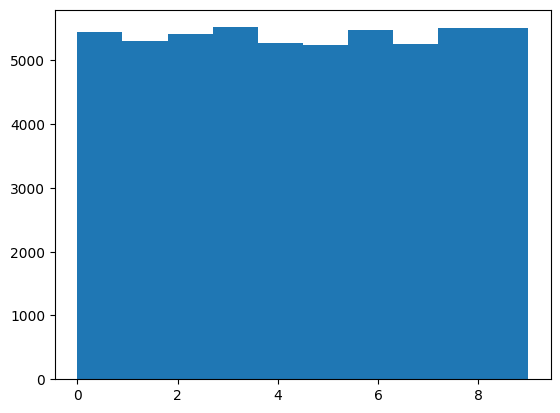

In [6]:
import matplotlib.pyplot as plt
plt.hist(diamonds["depth"]*10 %10)
plt.show()

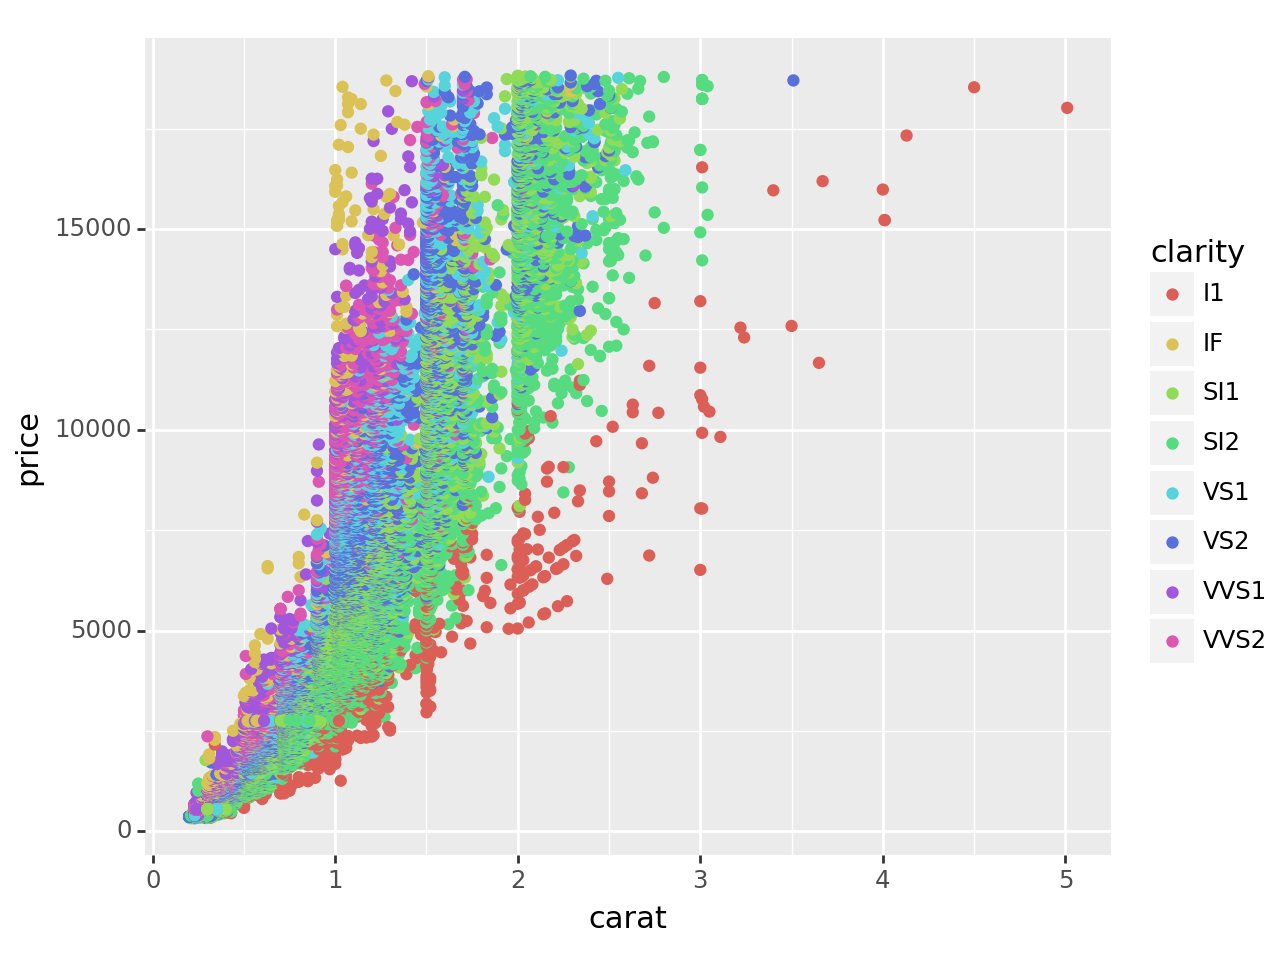

In [7]:
pp = ( 
ggplot(diamonds)
+ aes(x="carat",y="price",color = "clarity")
+ geom_point()
)
print(pp)

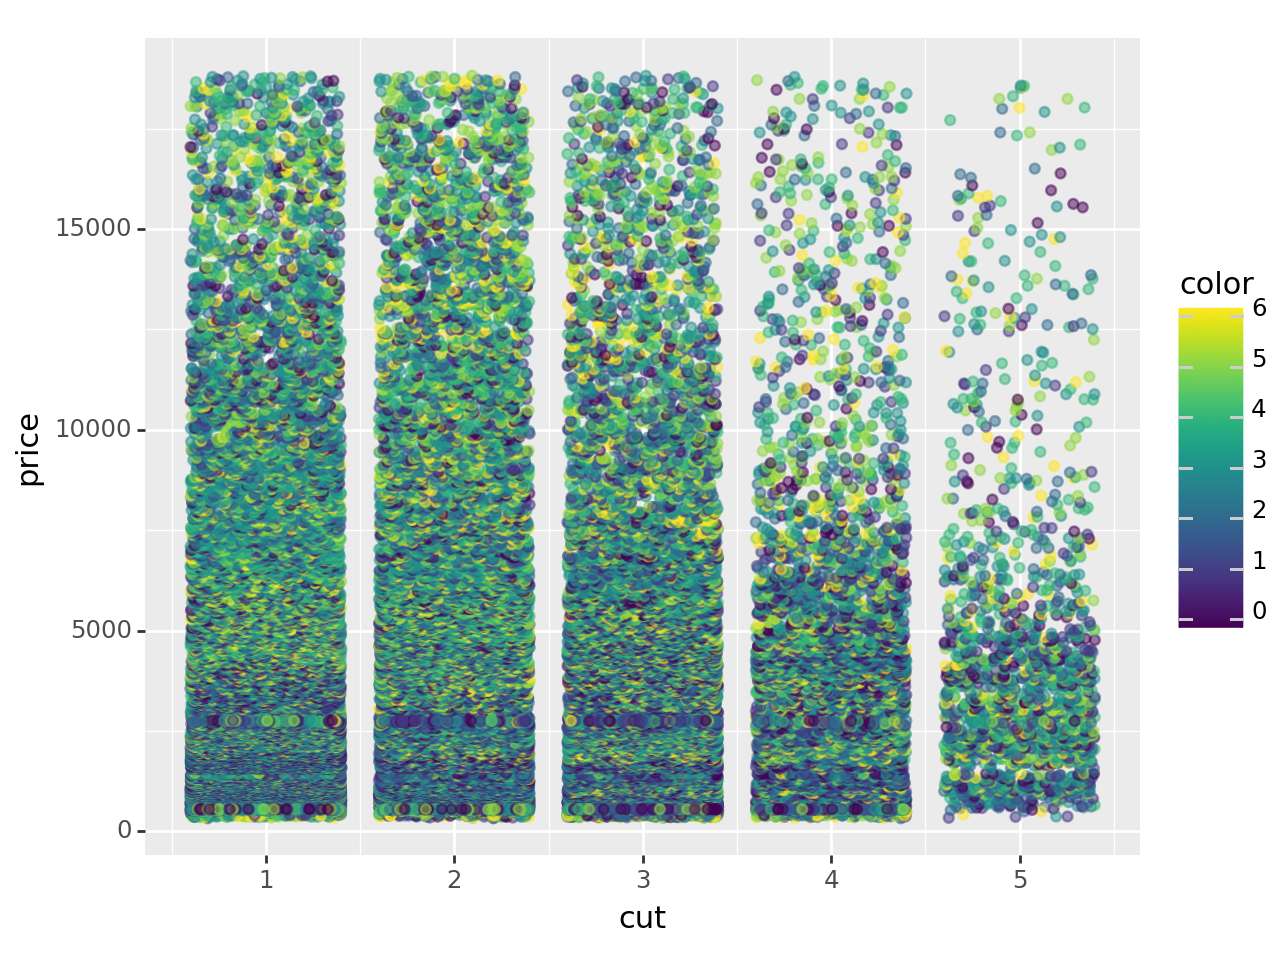

In [8]:
pp = ( 
    ggplot(diamonds)
    + aes(x="cut",y="price",color = "color")
    + geom_jitter(alpha = 0.5)
)
print(pp)

# PCA

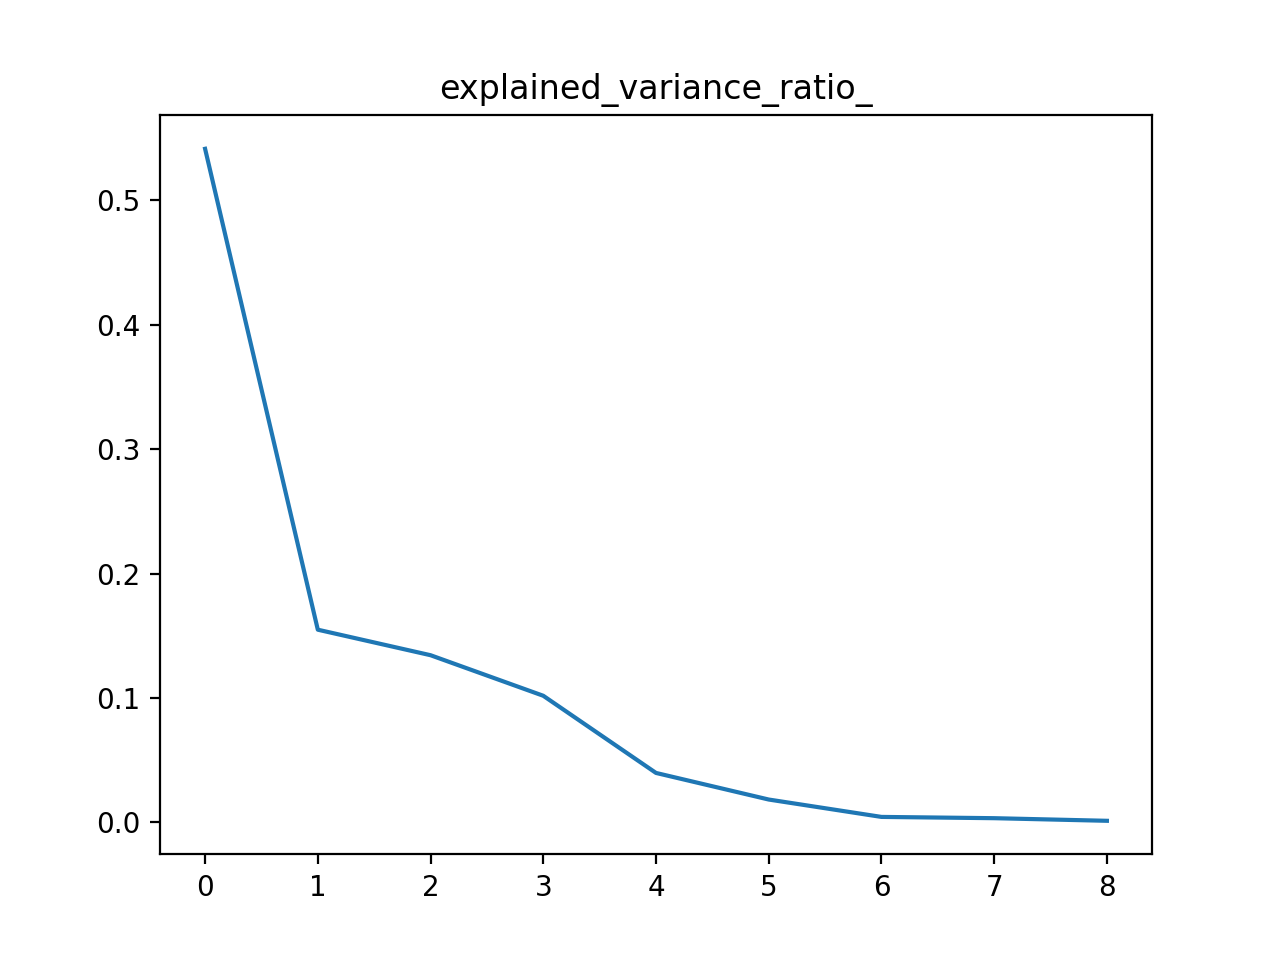

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dia_numeric = diamonds.select_dtypes(include=[float, int])
scaler = StandardScaler()
dia_scaled =  scaler.fit_transform(dia_numeric)

pca = PCA()  # Specify the number of components
pca.fit_transform(dia_scaled)

plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.title("explained_variance_ratio_")
plt.show()

In [9]:
components_df = pd.DataFrame(pca.components_, columns=dia_numeric.columns)
print(components_df[:4])


      carat       cut     color     depth     table     price         x  \
0  0.447161  0.079435  0.145145  0.004892  0.104807  0.416115  0.447098   
1 -0.043915  0.604968 -0.101354 -0.244522  0.740839 -0.087321 -0.028468   
2 -0.001988  0.524858  0.111935  0.822912 -0.149216 -0.069999 -0.044956   
3  0.034490  0.030689 -0.972305  0.110027 -0.092700  0.153833  0.045222   

          y         z  
0  0.441081  0.440523  
1 -0.032536 -0.060704  
2 -0.048506  0.057173  
3  0.047611  0.061770  


C:\Users\isido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names


          pc0       pc1        pc2        pc3
0  146.638323 -2.654421  19.987016  51.402263
1  147.187899  2.825693  18.220298  50.672227
2  148.349853  7.607861  16.198319  50.216436
3  151.283064 -1.181014  20.680539  48.632952
4  152.184926 -0.395874  22.507517  47.995029


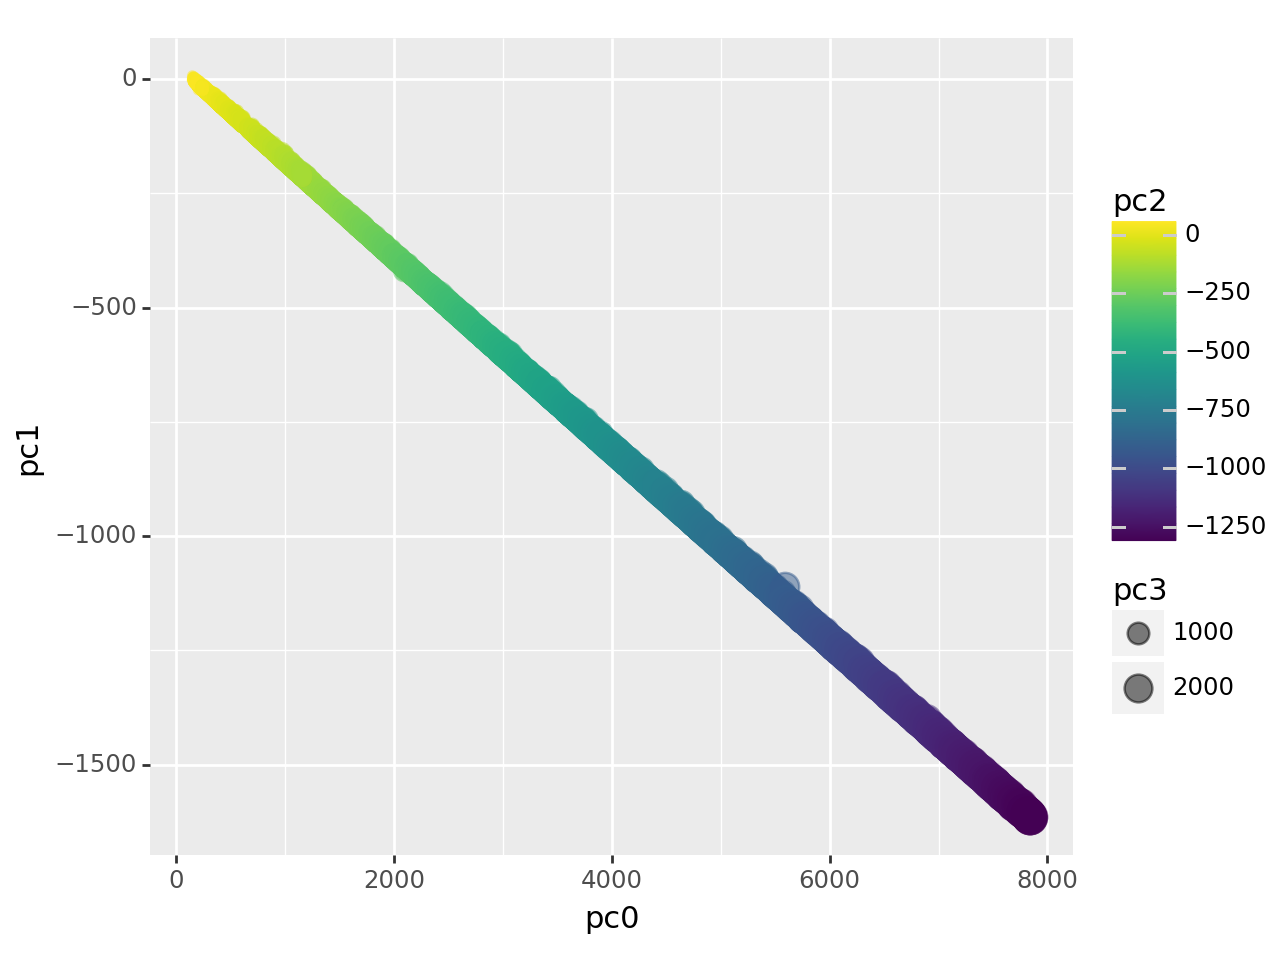

In [10]:
pca_dia = pca.transform(dia_numeric)
pca_df = pd.DataFrame(pca_dia[:,:4], columns= [f"pc{i}" for i in range(4)])

print(pca_df.head())
pp = ( 
    ggplot(pca_df)
    + aes(x="pc0",y="pc1",color="pc2",size="pc3")
    + geom_point(alpha =0.5)
)
print(pp)

# XGboost

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
X= diamonds.drop("price",axis=1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train["clarity"] = X_train["clarity"].astype("category")
X_test["clarity"] = X_test["clarity"].astype("category")
print(X_train.dtypes)
print(X_test.dtypes)

carat       float64
cut           int64
color         int64
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object
carat       float64
cut           int64
color         int64
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object


In [12]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [13]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [14]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 548.464


In [15]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=1500,
   nfold=5,
   verbose_eval = 10,
   early_stopping_rounds=20
)

[0]	train-rmse:3976.42946+9.90896	test-rmse:3976.28835+41.18282
[10]	train-rmse:552.62444+3.97840	test-rmse:594.86002+21.18844
[20]	train-rmse:485.81661+2.36961	test-rmse:556.25335+21.54529
[30]	train-rmse:460.53725+2.09592	test-rmse:550.96001+18.62022
[40]	train-rmse:441.99931+2.77574	test-rmse:549.55847+17.58034
[50]	train-rmse:428.46010+3.20375	test-rmse:548.30427+16.92251
[60]	train-rmse:413.77413+3.51983	test-rmse:547.61609+16.18461
[70]	train-rmse:400.41843+2.47250	test-rmse:547.95896+15.42020
[80]	train-rmse:389.89852+2.22526	test-rmse:547.78197+14.80883
[82]	train-rmse:387.98735+2.35651	test-rmse:547.87250+14.82739


In [16]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=1500,
   evals=evals,
   verbose_eval = 200,
   early_stopping_rounds=20
)

[0]	train-rmse:3976.04343	validation-rmse:3951.18363


[54]	train-rmse:436.22285	validation-rmse:544.12987


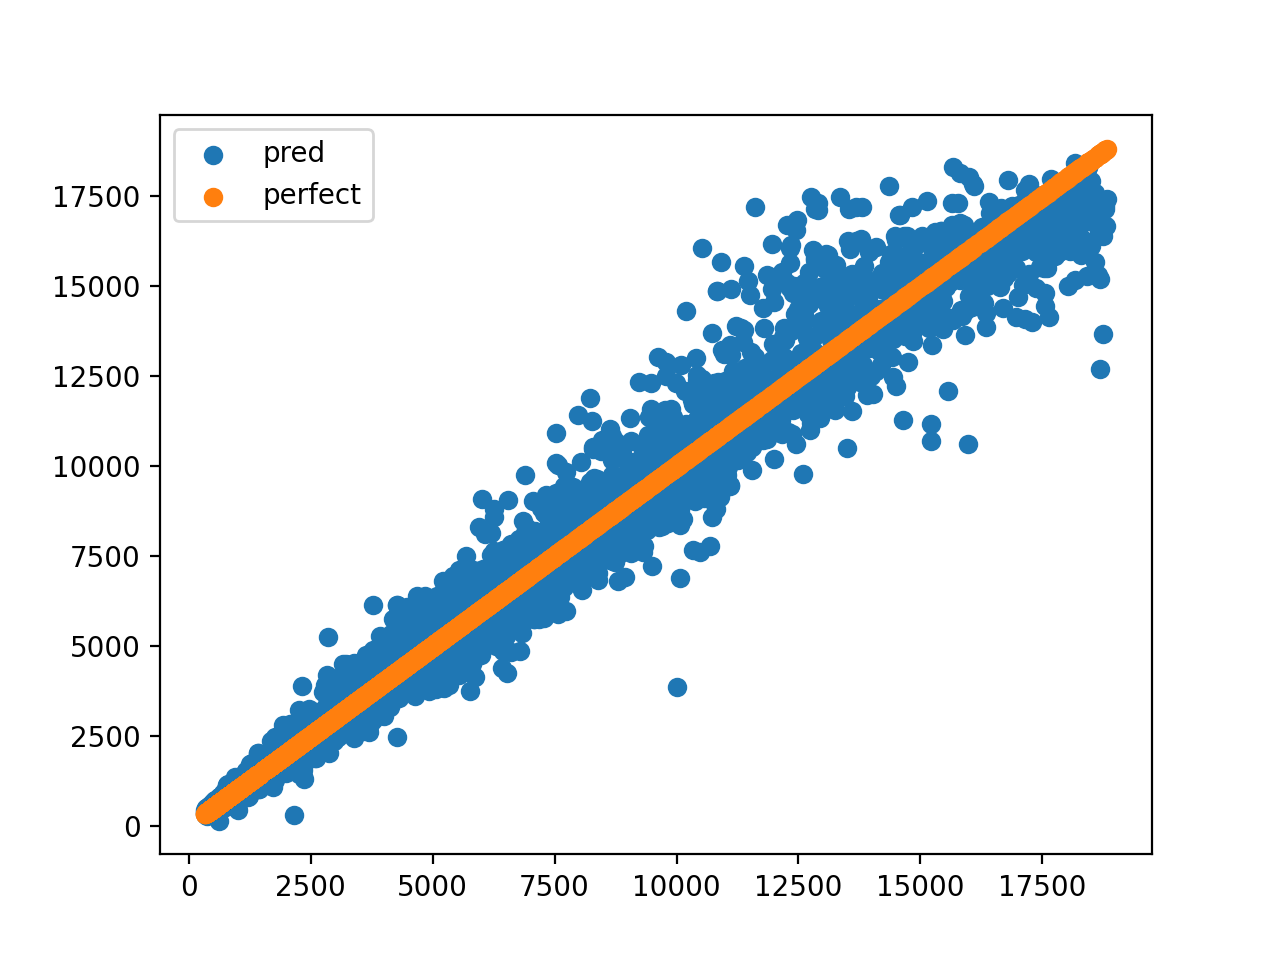

In [17]:
pred = model.predict(dtest_reg)
plt.scatter(y_test,pred, label="pred")
plt.scatter(y_test,y_test, label="perfect")
plt.legend()
plt.show()

# pytorch

In [18]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
print(diamonds.dtypes)
print(diamonds.columns)

carat      float64
cut          int64
color        int64
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [19]:
diamonds_encoded = pd.get_dummies(diamonds, columns=['clarity'])
print(diamonds_encoded.shape)
diamonds_tensor = torch.tensor(diamonds_encoded.values, dtype=torch.float32)

(53940, 17)


In [20]:
print(diamonds_tensor.shape)

torch.Size([53940, 17])


In [22]:
from sklearn.model_selection import train_test_split

train_set,  test_set = train_test_split(diamonds_tensor, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42)

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
nn_model = nn.Sequential(
    nn.Linear(in_features=16, out_features=20,dtype=torch.float),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=40,dtype = torch.float),
    nn.ReLU(),
    nn.Linear(in_features=40, out_features=20,dtype = torch.float),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=5,dtype = torch.float),
    nn.ReLU(),
    nn.Linear(in_features=5, out_features=1,dtype = torch.float)
).to(device)


from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_set.to(device), batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set.to(device), batch_size=1000, shuffle=True)

losses = []

def get_val():
    batch_val = next(iter(val_dataloader))
    y_pred = nn_model(batch_val[:,[i for i in range(17) if i !=5]]).squeeze()
    loss = loss_fn(y_pred, batch_val[:,5]) 
    return loss

torch.manual_seed(42)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params= nn_model.parameters(),lr = 0.01)
print(f"device = {device}")
print(torch.cuda.is_available())

device = cpu
False


In [23]:
#5th column is price column
for _ in range(3):
    for epoch,batch in enumerate(train_dataloader):
        nn_model.train()
        y_pred = nn_model(batch[:,[i for i in range(17) if i !=5]]).squeeze()
        loss = loss_fn(y_pred, batch[:,5]) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        nn_model.eval()
        with torch.inference_mode():
            if epoch%200 ==0:
                val_loss = get_val() 
                losses.append((loss.item(),val_loss))

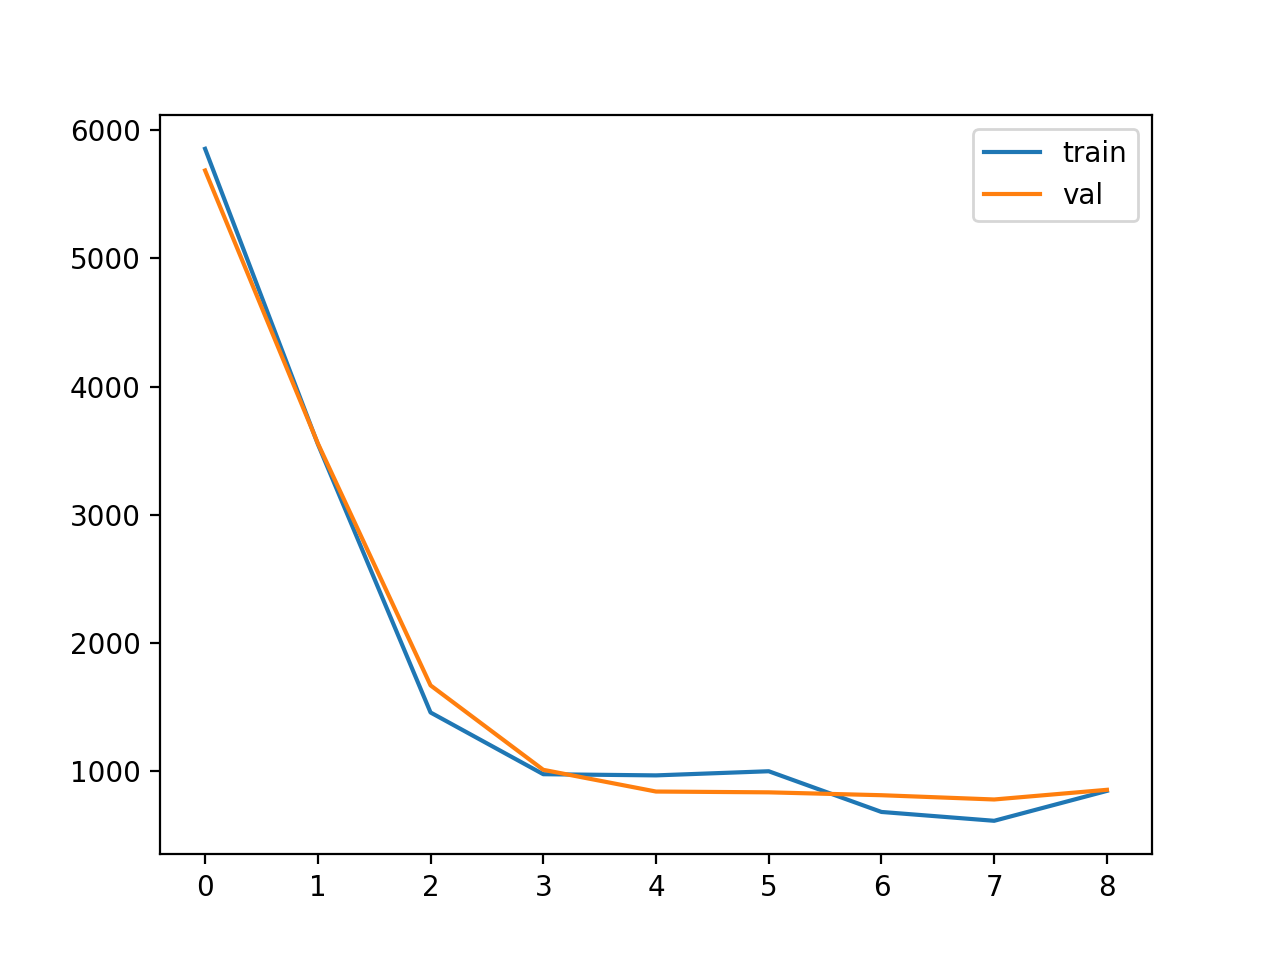

856.8246611763693


In [24]:
import matplotlib.pyplot as plt
train_losses, val_losses = zip(*losses)
plt.plot(range(len(train_losses)), np.sqrt(train_losses),label="train")
plt.plot(range(len(val_losses)), np.sqrt(val_losses),label="val")
plt.legend()
plt.show()
print(np.sqrt(val_losses[-1].item()))

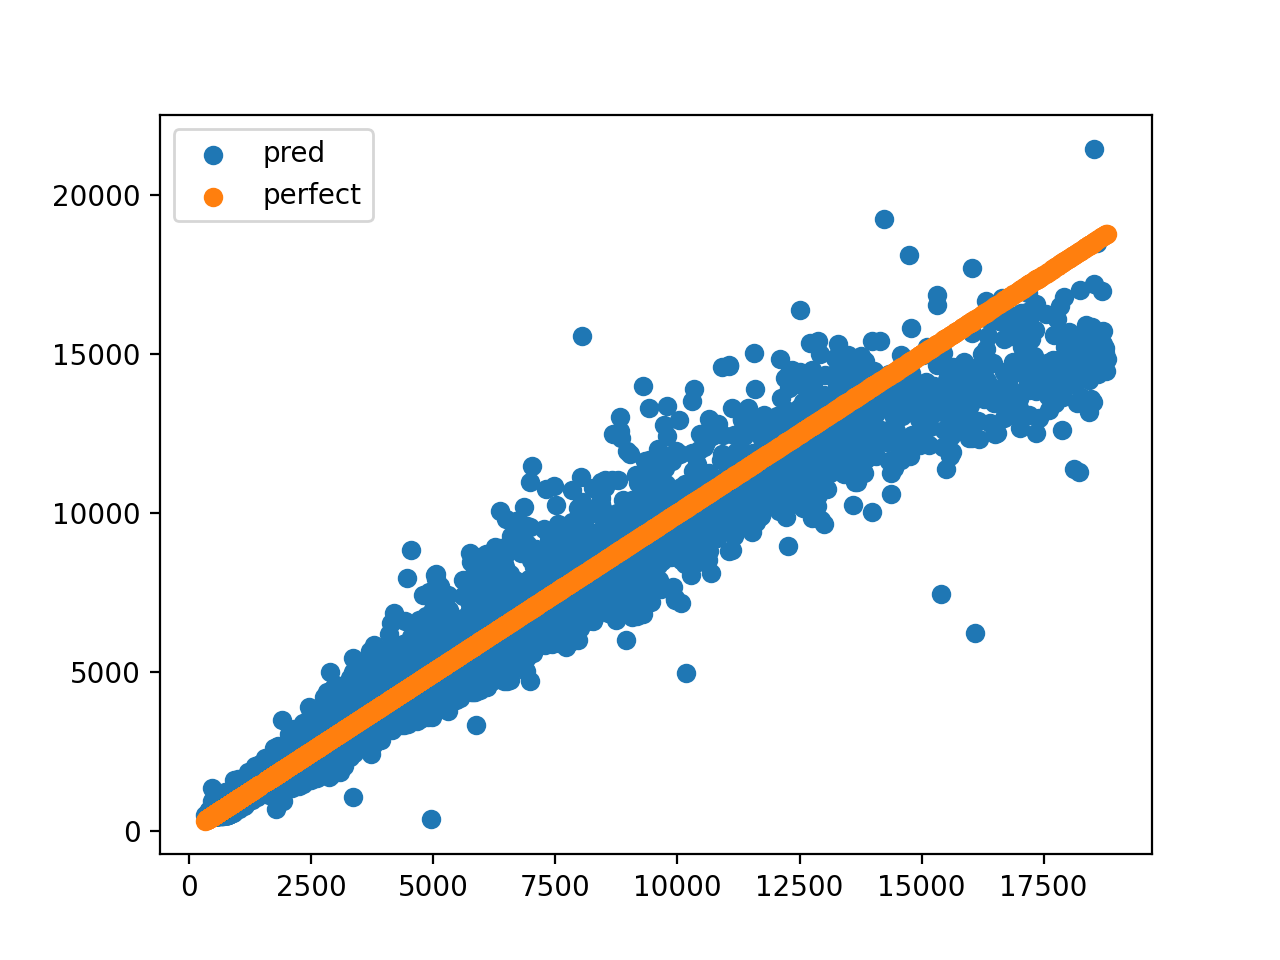

In [25]:
with torch.inference_mode():
    batch = val_set 
    y_pred = nn_model(batch[:,[i for i in range(17) if i !=5]]).squeeze()
    plt.scatter(batch[:,5],y_pred, label="pred")
    plt.scatter(batch[:,5],batch[:,5],label="perfect")
    plt.legend()
    plt.show()
